<a href="https://colab.research.google.com/github/tycoon-dev/ML-Car-Dealership-predictions/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Requisitos

In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install requests_html
!pip install seaborn
!pip install catboost

import requests
import re
import csv
import seaborn as sn
import catboost

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# Data Scraping (OPCIONAL)

O código seguinte tem como objectivo obter variaveis relevantes através do uso de Regular expressions (regex) por parte de requests feitos a vários links contidos num ficheiro .txt
### 1. Abrir Link da Página
###2. Converter Página numa string
###3. Filtrar informações para diversas váriaveis com o intuito de construir o dataset.


In [ ]:
#@title Definir URL a fazer scrapping
def reFind(stringToSearch, page):
  varToStore = re.search(stringToSearch, page)
  if varToStore:
      varToStore = varToStore.group(1)
  return varToStore

filename = "/content/linksDeCarrosSecundarios.txt" #@param {type:"string"}
linkList = []
listForCsv = []
header = ['Nome_Do_Carro', 'ValorEuros', 'Marca', 'TipoCombustivel', 'Quilometragem', 'Cilindrada', 'PotenciaMotor', 'TipoCarro', 'CaixaDeVelocidades', 'Ano']

with open('carrosFinal.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)

with open(filename) as file:
    for line in file:
        linkList.append(line.rstrip())

linkList = set(linkList)

#Exemplo Teste
URL = "https://www.standvirtual.com/anuncio/jaguar-xe-2-0-d-r-sport-aut-ID8PgPqL.html"
page = requests.get(URL)
page = str(page.text)
#print(page)

for link in linkList:

  URL = link
  page = requests.get(URL)
  page = str(page.text)

  name = reFind('title":"(.+?)"',page)
  price = reFind('ad_price":"(.+?)"',page)
  make = reFind('make":."(.+?)".',page)
  fuel_type = reFind('fuel_type":."(.+?)".,',page)
  mileage = reFind('mileage":."(.+?)".',page)
  engine_capacity = reFind('engine_capacity":."(.+?)".',page)
  engine_power = reFind('engine_power":."(.+?)".',page)
  body_type = reFind('body_type":."(.+?)".',page)
  gearbox = reFind('gearbox":."(.+?)".',page)
  year = reFind('1_registration_year":."(.+?)".',page)

  with open('carrosFinal.csv', 'a', encoding='UTF8') as f:
    writer = csv.writer(f)
    data = [name,price,make,fuel_type,mileage,engine_capacity,engine_power,body_type,gearbox,year]
    writer.writerow(data)

**Mostrar o Dataset**

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

df=pd.read_csv('/content/carrosFinal.csv')
df


,Nome_Do_Carro,ValorEuros,Marca,TipoCombustivel,Quilometragem,Cilindrada,PotenciaMotor,TipoCarro,CaixaDeVelocidades,Ano
0,mercedesbenz c 200,18,mercedes-benz,diesel,230389,2143.0,136,combi,automatic,2015
1,mercedesbenz g 300 gd,41750,mercedes-benz,diesel,286379,2996.0,113,suv,manual,1994
2,fiat 500,18900,fiat,gaz,49,999.0,70,compact,manual,2020
3,fiat 500c 1 2 lounge,10900,fiat,gaz,51725,1242.0,69,cabrio,manual,2014
4,opel adam 1 2 glam,11900,opel,gaz,60986,1229.0,70,mini,manual,2016
...,...,...,...,...,...,...,...,...,...,...
834,toyota corolla hatchback 1 3 xli,1665,toyota,gaz,146100,1332.0,88,sedan,manual,1993
835,renault mgane sport tourer 1 5 dci intens,18200,renault,diesel,50154,1461.0,110,combi,manual,2017
836,peugeot 108 1 0 vti style,12750,peugeot,gaz,16200,998.0,72,mini,manual,2021
837,seat leon,10500,seat,diesel,155350,1598.0,105,compact,manual,2010


# Modelação de Gráficos

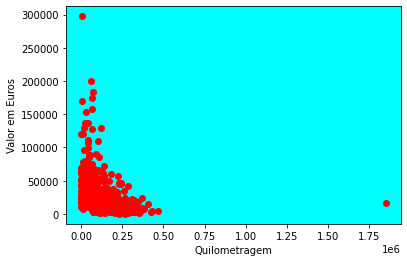

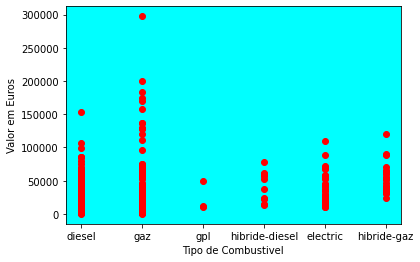

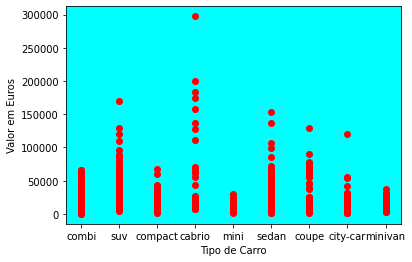

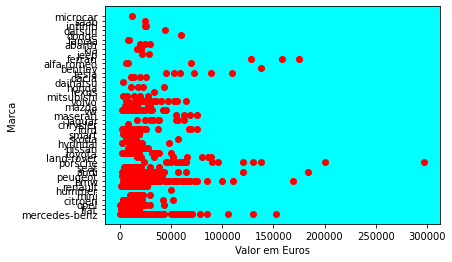

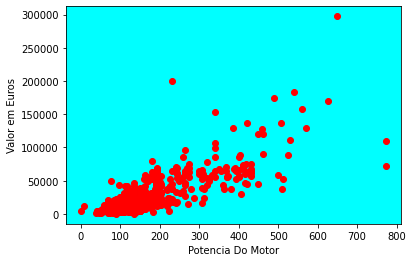

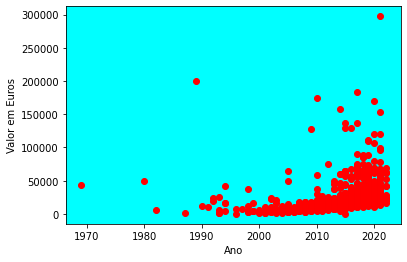

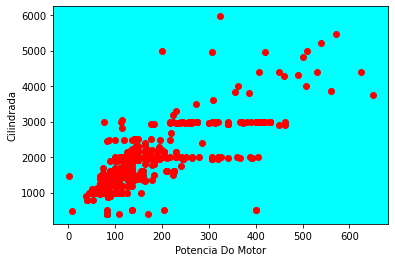

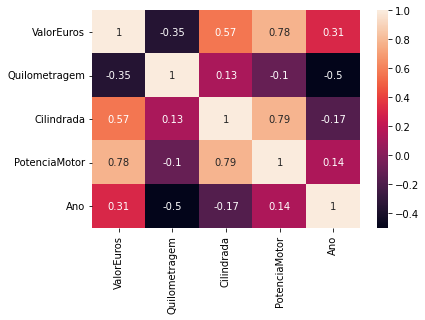

In [ ]:
df=pd.read_csv('/content/carrosFinal.csv')
df.head()


data = pd.read_csv('/content/carrosFinal.csv')


plt.rcParams.update({'axes.facecolor':'cyan'})
plt.scatter(data.Quilometragem, data.ValorEuros, color ="red")
plt.xlabel('Quilometragem')
plt.ylabel('Valor em Euros')
plt.show()

plt.scatter(data.TipoCombustivel, data.ValorEuros, color="red")
plt.xlabel('Tipo de Combustivel')
plt.ylabel('Valor em Euros')
plt.show()

plt.scatter(data.TipoCarro, data.ValorEuros,color="red")
plt.xlabel('Tipo de Carro')
plt.ylabel('Valor em Euros')
plt.show()

plt.scatter(data.ValorEuros,data.Marca,color="red")
plt.xlabel('Valor em Euros')
plt.ylabel('Marca')
plt.show()

plt.scatter(data.PotenciaMotor,data.ValorEuros,color="red")
plt.xlabel('Potencia Do Motor')
plt.ylabel('Valor em Euros')
plt.show()


plt.scatter(data.Ano,data.ValorEuros,color="red")
plt.xlabel('Ano')
plt.ylabel('Valor em Euros')
plt.show()

plt.scatter(data.PotenciaMotor,data.Cilindrada,color="red")
plt.xlabel('Potencia Do Motor')
plt.ylabel('Cilindrada')

plt.show()

sn.heatmap(data.corr(), annot=True)
plt.show()


# Hipotese 1: Será que podemos ter uma previsão de preço?

## Isto é uma implementação através do uso de regressão linear (Sklearn e Catboost Regressor)




 Regressão linear usando SKlearn: 

Valores de Teste:
 [26500 20900  7900 34000 40900 17999 21750 37900 11500  5350 13997 14900
  7800 69500 37500  8990 59500  8000 20990 16000 10900 21700 15900  3500
  8250 24500 13790 66990  6290 12500  4400 49500  8990 20900 10750  5490
 18650 24500 18500 34500 64950 18990 17950 16250 44800  3750 18900 78500
 15900  7749  3800  4150  2590 11500 19900 14500 39500   390 23299 20290
 20450 54900 29900 17750 15990 15900 12500 57000 22000  8950 26999 21350
 12390 12700 13900 51900 10590 19990 62850 21490 12990 46850 12450 12900
 12490 65000 15000 23900 19900  3950  5500 27400 16950 19990  3265 41750
 18499 21700 56500 38750 44250 51900 21500 10900 36900  2750 24900 28500
 25250  6980  1750 37900 10990  9250 85500 10950 38000 25500 34500  6750
 23350 21990 16800 18499 17950 19800  4999  1250  7900 11290  1750 13950
  3950  5950 39900 20990 14990  7900 11490 11400 25550 22990 13999 55800
 41000 26000 41499  9950 14600 22900 15490  2600 49490  7900 32900 1

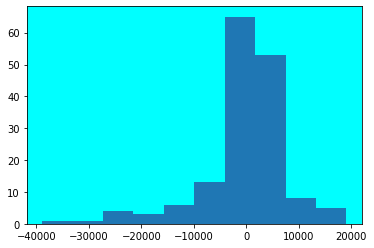


 Regressão linear usando Catboost: 

Valores de Teste:
 [26500 20900  7900 34000 40900 17999 21750 37900 11500  5350 13997 14900
  7800 69500 37500  8990 59500  8000 20990 16000 10900 21700 15900  3500
  8250 24500 13790 66990  6290 12500  4400 49500  8990 20900 10750  5490
 18650 24500 18500 34500 64950 18990 17950 16250 44800  3750 18900 78500
 15900  7749  3800  4150  2590 11500 19900 14500 39500   390 23299 20290
 20450 54900 29900 17750 15990 15900 12500 57000 22000  8950 26999 21350
 12390 12700 13900 51900 10590 19990 62850 21490 12990 46850 12450 12900
 12490 65000 15000 23900 19900  3950  5500 27400 16950 19990  3265 41750
 18499 21700 56500 38750 44250 51900 21500 10900 36900  2750 24900 28500
 25250  6980  1750 37900 10990  9250 85500 10950 38000 25500 34500  6750
 23350 21990 16800 18499 17950 19800  4999  1250  7900 11290  1750 13950
  3950  5950 39900 20990 14990  7900 11490 11400 25550 22990 13999 55800
 41000 26000 41499  9950 14600 22900 15490  2600 49490  7900 32900 

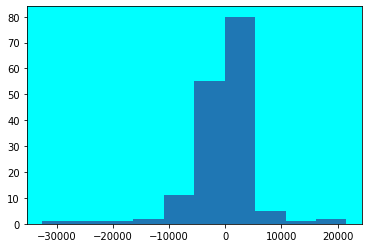

In [ ]:
data = pd.read_csv('/content/carrosFinal.csv')

data = data.dropna()
data.drop(columns=['Nome_Do_Carro'],inplace=True)
#data=(data-data.mean())/data.std()

data = data[data.ValorEuros < data.ValorEuros.quantile(0.975)]

le = LabelEncoder()
le.fit(data.TipoCarro)
data['TipoCarro'] = le.transform(data['TipoCarro'])
le.fit(data.TipoCombustivel)
data['TipoCombustivel'] = le.transform(data['TipoCombustivel'])
le.fit(data.Marca)
data['Marca'] = le.transform(data['Marca'])
le.fit(data.CaixaDeVelocidades)
data['CaixaDeVelocidades'] = le.transform(data['CaixaDeVelocidades'])

X = data.drop('ValorEuros',axis=1).values
Y = data['ValorEuros'].values


#data = data[data.PotenciaMotor < data.PotenciaMotor.quantile(0.975)]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=2)

regr = linear_model.LinearRegression()
#regr = linear_model.LassoLars(alpha=0.5, normalize=True)

regr.fit(x_train, y_train)

preds = regr.predict(x_test)

residuals = preds - y_test

print("\n Regressão linear usando SKlearn: \n")

print("Valores de Teste:\n", y_test)
print("\n Valores preditos:\n", preds)
print("\n")
print("Coefficients:",  regr.coef_)
print("R2 error: %.2f" % r2_score(y_test, preds))
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, preds,squared=False))
print("Mean Square Error", mean_squared_error(y_test, preds))
print("Mean Absolute Error", mean_absolute_error(y_test,preds))
print("\n")
#print(residuals)

plt.hist(residuals)
plt.show()


model = CatBoostRegressor() 

model.fit(x_train, y_train,verbose=False)

preds = model.predict(x_test)
residuals = preds - y_test
print("\n Regressão linear usando Catboost: \n")
print("Valores de Teste:\n", y_test)
print("\n Valores preditos:\n", preds)
print("R2 error: %.2f" % r2_score(y_test, preds))
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, preds,squared=False))
print("Mean Square Error", mean_squared_error(y_test, preds))
print("Mean Absolute Error", mean_absolute_error(y_test,preds))

print("Score final:\n", model.score(X,Y))

plt.hist(residuals)
plt.show()



# Hipotese 2: É possível predizer o Ano sabendo caracteristicas do Carro (Preço, Marca, etc)?

## Implementaçao Linear Regression Sklearn e Catboost Regressor


 Regressão linear usando SKlearn: 

Valores de Teste:
 [2020 2021 2011 2021 2021 2010 2021 2013 2013 2011 2018 2011 2011 2020
 2021 2011 2021 2011 2022 2011 2015 2017 2017 2000 2010 2016 2017 2020
 2012 2015 2002 2005 2014 2003 2005 2005 2012 2017 2016 2017 2021 2014
 2016 2020 2017 2002 2017 2021 2009 2007 1998 2008 2005 2013 2019 2013
 2018 1996 2020 2022 2021 2017 2021 2008 2014 2007 2017 2016 2014 2009
 2018 2017 2016 2018 2018 2019 2015 2021 2019 2019 2017 2017 2016 2018
 2017 2015 2010 2014 2018 2007 2008 2017 2017 2021 1998 1994 2020 2017
 2015 2016 2018 2021 2018 2006 2013 2001 2017 2017 2018 2009 2001 1998
 2014 2010 2018 2015 2021 2015 2017 2011 2019 2022 2019 2020 2017 2017
 2009 2004 2013 2016 1987 2013 2005 1993 2018 2017 2005 2010 2013 2008
 2017 2017 2016 2019 2020 2021 2020 2010 2012 2018 2016 2002 2020 2002
 2016 2019 2016 2021 2017]

 Valores preditos:
 [2017 2015 2009 2019 2017 2007 2015 2013 2011 2011 2015 2010 2010 2025
 2017 2011 2023 2011 2017 2010 2012 2013 201

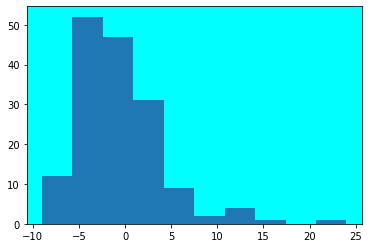


 Regressão linear usando Catboost: 

Valores de Teste:
 [2020 2021 2011 2021 2021 2010 2021 2013 2013 2011 2018 2011 2011 2020
 2021 2011 2021 2011 2022 2011 2015 2017 2017 2000 2010 2016 2017 2020
 2012 2015 2002 2005 2014 2003 2005 2005 2012 2017 2016 2017 2021 2014
 2016 2020 2017 2002 2017 2021 2009 2007 1998 2008 2005 2013 2019 2013
 2018 1996 2020 2022 2021 2017 2021 2008 2014 2007 2017 2016 2014 2009
 2018 2017 2016 2018 2018 2019 2015 2021 2019 2019 2017 2017 2016 2018
 2017 2015 2010 2014 2018 2007 2008 2017 2017 2021 1998 1994 2020 2017
 2015 2016 2018 2021 2018 2006 2013 2001 2017 2017 2018 2009 2001 1998
 2014 2010 2018 2015 2021 2015 2017 2011 2019 2022 2019 2020 2017 2017
 2009 2004 2013 2016 1987 2013 2005 1993 2018 2017 2005 2010 2013 2008
 2017 2017 2016 2019 2020 2021 2020 2010 2012 2018 2016 2002 2020 2002
 2016 2019 2016 2021 2017]

 Valores preditos:
 [2020 2020 2009 2020 2021 2009 2018 2015 2013 2007 2019 2012 2011 2020
 2019 2011 2020 2011 2020 2006 2014 2014 20

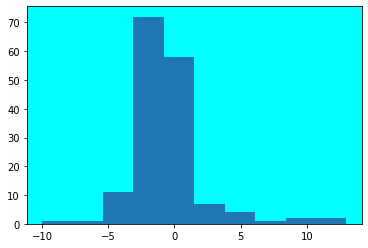

In [ ]:
data = pd.read_csv('/content/carrosFinal.csv')

data = data.dropna()
data.drop(columns=['Nome_Do_Carro'],inplace=True)
#data=(data-data.mean())/data.std()

data = data[data.ValorEuros < data.ValorEuros.quantile(0.975)]

le = LabelEncoder()
le.fit(data.TipoCarro)
data['TipoCarro'] = le.transform(data['TipoCarro'])
le.fit(data.TipoCombustivel)
data['TipoCombustivel'] = le.transform(data['TipoCombustivel'])
le.fit(data.Marca)
data['Marca'] = le.transform(data['Marca'])
le.fit(data.CaixaDeVelocidades)
data['CaixaDeVelocidades'] = le.transform(data['CaixaDeVelocidades'])

X = data.drop('Ano',axis=1).values
Y = data['Ano'].values


#data = data[data.PotenciaMotor < data.PotenciaMotor.quantile(0.975)]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=2)

regr = linear_model.LinearRegression()
#regr = linear_model.LassoLars(alpha=0.5, normalize=True)

regr.fit(x_train, y_train)

preds = regr.predict(x_test)
preds = preds.astype(int)
residuals = preds - y_test

print("\n Regressão linear usando SKlearn: \n")

print("Valores de Teste:\n", y_test)
print("\n Valores preditos:\n", preds)
print("\n")
print("Coefficients:",  regr.coef_)
print("R2 error: %.2f" % r2_score(y_test, preds))
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, preds,squared=False))
print("Mean Square Error", mean_squared_error(y_test, preds))
print("Mean Absolute Error", mean_absolute_error(y_test,preds))
print("\n")
#print(residuals)

plt.hist(residuals)
plt.show()


model = CatBoostRegressor(iterations=1000, learning_rate=0.03) 

model.fit(x_train, y_train,verbose=False)

preds = model.predict(x_test)
preds = preds.astype(int)
residuals = preds - y_test
print("\n Regressão linear usando Catboost: \n")
print("Valores de Teste:\n", y_test)
print("\n Valores preditos:\n", preds)
print("R2 error: %.2f" % r2_score(y_test, preds))
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, preds,squared=False))
print("Mean Square Error", mean_squared_error(y_test, preds))
print("Mean Absolute Error", mean_absolute_error(y_test,preds))

print("\n Score final:\n", model.score(X,Y))

plt.hist(residuals)
plt.show()





```
# Isto está formatado como código
```

# Hipotese 3: Adivinha o tipo de Combustivel á base de outros dados?
### KNN vs Catboost Classifier


In [ ]:
data = pd.read_csv('/content/carrosFinal.csv')

data = data.dropna()
data.drop(columns=['Nome_Do_Carro'],inplace=True)
#data=(data-data.mean())/data.std()

le = LabelEncoder()
le.fit(data.TipoCarro)
data['TipoCarro'] = le.transform(data['TipoCarro'])
le.fit(data.TipoCombustivel)
data['TipoCombustivel'] = le.transform(data['TipoCombustivel'])
print(le.classes_)
le.fit(data.Marca)
data['Marca'] = le.transform(data['Marca'])
le.fit(data.CaixaDeVelocidades)
data['CaixaDeVelocidades'] = le.transform(data['CaixaDeVelocidades'])


X = data.drop('TipoCombustivel',axis=1).values
Y = data['TipoCombustivel'].values

sc = StandardScaler()
X = sc.fit_transform(X)

#data = data[data.PotenciaMotor < data.PotenciaMotor.quantile(0.975)]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=42)


model = KMeans(n_clusters=6)
#regr = linear_model.LassoLars(alpha=0.5, normalize=True)

#regr.fit(x_train, y_train)

preds = model.fit_predict(x_test)

residuals = preds - y_test

print("TESTE DO MODELO KMEANS COM 6 CLUSTERS\n")
print("ARI =", adjusted_rand_score(y_test,preds))

print("Valores de Teste:\n", y_test)
print("\n Valores preditos:\n", preds)
print("\n")

print("\n")

conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
print(metrics.classification_report(y_test, preds))
#conf_matrix

model = CatBoostClassifier()
model.fit(x_train, y_train,verbose=False)
#print(model)

preds = model.predict(x_test)
print("TESTE DO MODELO Catboost Classifier \n")
print("Valores de Teste:\n", y_test)
print("\n Valores preditos:\n", *preds)
print("\n")

print("\n")

conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
print (conf_matrix)
print(metrics.classification_report(y_test, preds))

print("LEGENDA: \n")
print("0: Diesel, 1: electric, 2: Gasolina, 3: GPL, 4: Hibrido-Diesel, 5: Hibrido-Gasolina")


['diesel' 'electric' 'gaz' 'gpl' 'hibride-diesel' 'hibride-gaz']
TESTE DO MODELO KMEANS COM 6 CLUSTERS

ARI = 0.03360603515809157
Valores de Teste:
 [0 0 2 0 0 1 0 0 2 0 0 0 5 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 2 0 0 0 2 0 2 0 2 5 0 4 2 0 0 0 0 0 2 5 2 2 0 2 0 0 0 0 0 0 0 0 2 2
 0 0 0 0 0 0 0 0 2 5 0 0 0 0 0 2 5 0 3 0 0 0 0 0 0 0 2 0 0 0 2 2 0 2 0 0 0
 0 2 2 0 0 1 0 0 5 0 0 0 2 2 0 1 2 0 1 0 0 0 0 0 0 0 0 0 2 0 2 2 1 0 0 3 0
 2 0 0 0 0 2 0 2 0 2 0 0 0 5 0 0]

 Valores preditos:
 [0 2 2 0 2 0 0 2 4 0 0 2 0 2 2 5 2 3 0 2 2 0 4 2 3 2 5 2 3 0 2 0 3 2 2 2 5
 5 2 4 2 2 0 2 4 4 2 3 2 0 5 4 5 2 2 2 0 5 4 0 5 2 2 2 2 3 5 0 0 2 2 0 4 5
 0 5 5 0 5 0 0 5 2 4 3 2 0 3 2 5 4 0 2 0 5 0 2 0 2 5 2 2 2 5 2 4 0 2 4 5 2
 2 0 5 5 0 2 0 5 0 2 5 5 2 3 5 2 0 2 2 0 0 2 2 0 5 2 0 5 3 0 2 3 0 4 2 3 0
 2 0 0 5 0 2 2 5 2 2 2 2 1 0 5 0]




              precision    recall  f1-score   support

           0       0.80      0.32      0.46       112
           1       0.00      0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusão
#Resumo dos resultados:

## Hipotese 1
Embora o SKlearn faça um bom trabalho a realizar uma simples regressão linear num curto espaço de tempo, o CatBoost regressor consegue obter melhor pontuação apesar de demorar um pouco mais. 

SKlearn R2: 0.78
CatBoost R2: 0.89
Score do Catboost de acordo com a avaliação do próprio modelo: 0.967~

## Hipotese 2

Outro problema de Regressão Linear. Dado que temos variaveis categoricas como TipoCombustivel, Marcas e TipoDeCarro, será que é possível determinar com estas categorias e outras númericas, um dado ano de um veículo?

Comparando o Sklearn com o Catboost, denota-se uma diferença grande nas suas respetivas predições. O Sklearn tem um Mean Absolute error de 3.46~, enquanto o Catboost obteve um MAS de 1.82~. Estes valores podem ser justificados ao observar-se o historiograma de residuos de ambos os modelos, bem como o R2 obtido por cada um, em baixo denotado:

Sklearn R2: 0.52
CatBoost R2: 0.82

## Hipotese 3

Foi usado o Kmeans e o Catboost Classifier como comparação. As pontuações aqui diferem bastante. 
Existe uma predominância de carros que são Diesel / gasolina. O Kmeans acertou 80% dos 112 casos de veiculos diesel e 30% dos 37 dos veiculos a gasolina. O resto dos tipos falhou na sua avaliação e noutros obteve 8% de precisão (GPL e Hibrido-Diesel respetivamente).

O Catboost classifier atingiu uma precisão de 94% dos veiculos diesel e 82% nos veiculos a gasolina, contudo, não acertou no adivinho de veiculos a gás ou hibrido diesels, no qual havia ao todo 3 veiculos. No entanto, obteve uma precisão de 67% na avaliação de veioculos hibridos-Gasolina.

Kmeans Score: 0.35
Catboost Classifier Score: 0.91

## Conclusão

Obteve-se pontuações bastante satisfatórias na primeira hipótese usando ambos os modelos, porém existe uma clara evidência que o Catboost triunfa face ao Sklearn em troco de tempo de execução. Embora na terceira hipotese exista uma discrepância de scores entre Kmeans e o Catboost classifier, isto pode-se derivar de vários fatores, como a necessidade de ter uma quantia maior de dados ou simplesmente o algoritmo do Kmeans não se adequar á pergunta.

Em geral, as hipoteses vieram a fazer predições com um certo grau de precisão, superando o objectivo de obter-se pelo menos 0.80% de score em cada hipotese formulada.


